<a href="https://colab.research.google.com/github/Luissalamanca23/Ev1-FundamentosML-Luis_Salamanca/blob/main/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


# Cargamos el dataset


In [ ]:
url = '/content/Drive/MyDrive/Machine/Prueba1/data/data.csv'
df = pd.read_csv(url, sep=",", encoding='latin-1') # Changed encoding to 'latin-1'
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Identificación y descripción de las variables (categóricas y numéricas).

In [ ]:
# Calculate Q1 and IQR for relevant columns
# Select only numerical columns
numerical_df = df.select_dtypes(include=np.number)

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame using numerical columns only
df = df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(444108, 8)

vemos los datos que tenemos en el dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444108 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    444108 non-null  object 
 1   StockCode    444108 non-null  object 
 2   Description  443306 non-null  object 
 3   Quantity     444108 non-null  int64  
 4   InvoiceDate  444108 non-null  object 
 5   UnitPrice    444108 non-null  float64
 6   CustomerID   327498 non-null  float64
 7   Country      444108 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.5+ MB


# Analizamos los datos nulos

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## Identificamos las variables Categóricas


*   InvoiceNo
*   StockCode
*   Description
*   Country
*   InvoiceDate




## Identificamos las variables Numericas

*   Quantity
*   UnitPrice
*   CustomerID


# Cálculo de medidas de tendencia central y dispersión.

In [ ]:
calculo_de_medidas = df[['Quantity', 'UnitPrice']].describe()
print(calculo_de_medidas)

            Quantity      UnitPrice
count  444108.000000  444108.000000
mean        4.803066       2.694544
std         4.616762       1.930320
min       -12.000000       0.000000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%         8.000000       3.750000
max        23.000000       8.330000


# Analisis de datos atipicos

<Axes: xlabel='UnitPrice'>

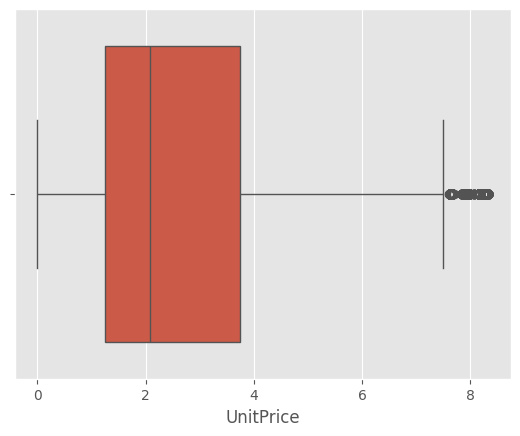

In [ ]:
sns.boxplot(x=df['UnitPrice'])

### En primera instacia vemos que hay datos negativos, vamos a revisar con mas detalle


In [ ]:
df['UnitPrice'].describe()

,UnitPrice
count,541907.000000
mean,4.651957
std,94.395447
min,0.000000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


Vemos que hay datos negativos en el valor (los borraremos)

In [ ]:
df = df[df['UnitPrice'] >= 0]

Realizaremos un histograma para ver en que paises se realizaron mas compras

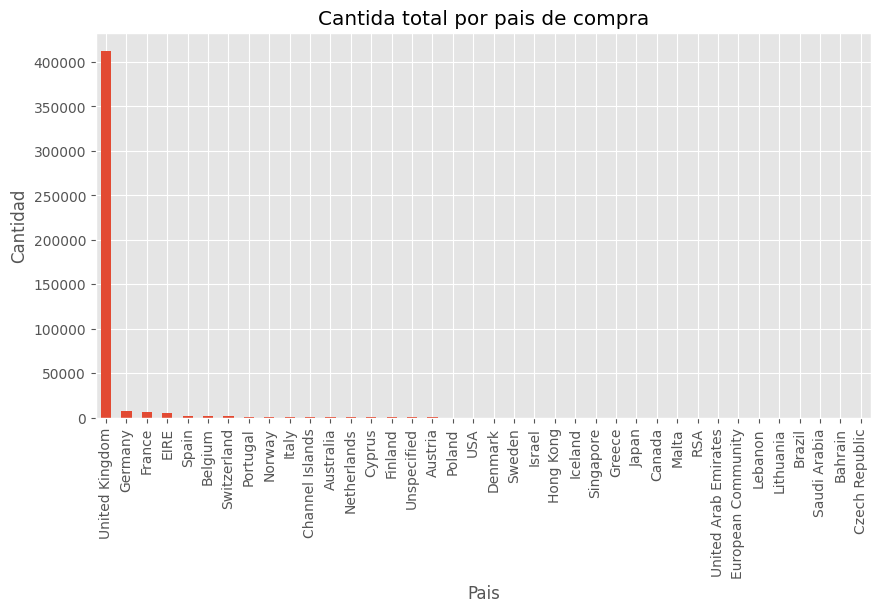

In [ ]:
df.Country.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Cantida total por pais de compra")
plt.ylabel('Cantidad')
plt.xlabel('Pais');

In [ ]:
df.Country.value_counts().nlargest(40)

,count
Country,
United Kingdom,412332
Germany,7025
France,6371
EIRE,5650
Spain,1915
Belgium,1539
Switzerland,1379
Portugal,1233
Norway,661


Podemos ver que con mucha diferencia el pais con mas compras es **United Kingdom**

In [ ]:
df.select_dtypes(include=np.number).median()

,0
Quantity,3.00
UnitPrice,2.08
CustomerID,15152.00


In [ ]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [ ]:
df['Description'].mode()

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER


El producto mas vendido del dataset es (WHITE HANGING HEART T-LIGHT HOLDER)

In [ ]:
df.Description.value_counts().nlargest(40)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1976
JUMBO BAG RED RETROSPOT,1857
LUNCH BAG RED RETROSPOT,1496
PARTY BUNTING,1313
LUNCH BAG BLACK SKULL.,1287
NATURAL SLATE HEART CHALKBOARD,1225
SET OF 3 CAKE TINS PANTRY DESIGN,1197
LUNCH BAG SPACEBOY DESIGN,1150
LUNCH BAG CARS BLUE,1139


# Analizamos el comportamiento de las compras por fecha

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

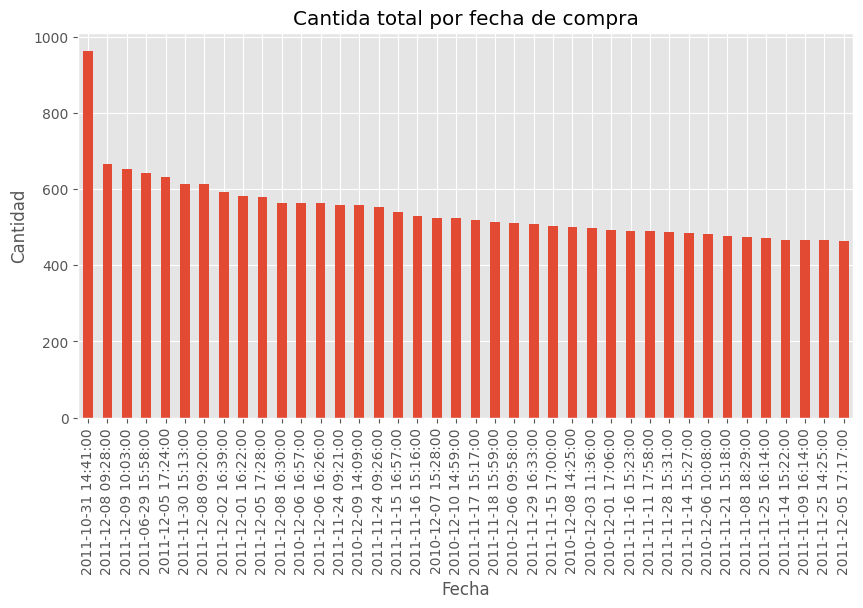

In [ ]:
df.InvoiceDate.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Cantida total por fecha de compra")
plt.ylabel('Cantidad')
plt.xlabel('Fecha');

# Analizar el comportamiento temporal de las compras

In [ ]:
purchases_per_day = df.groupby('InvoiceDate').agg({'Quantity': 'sum'}).reset_index()

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue_per_day = df.groupby('InvoiceDate').agg({'Revenue': 'sum'}).reset_index()

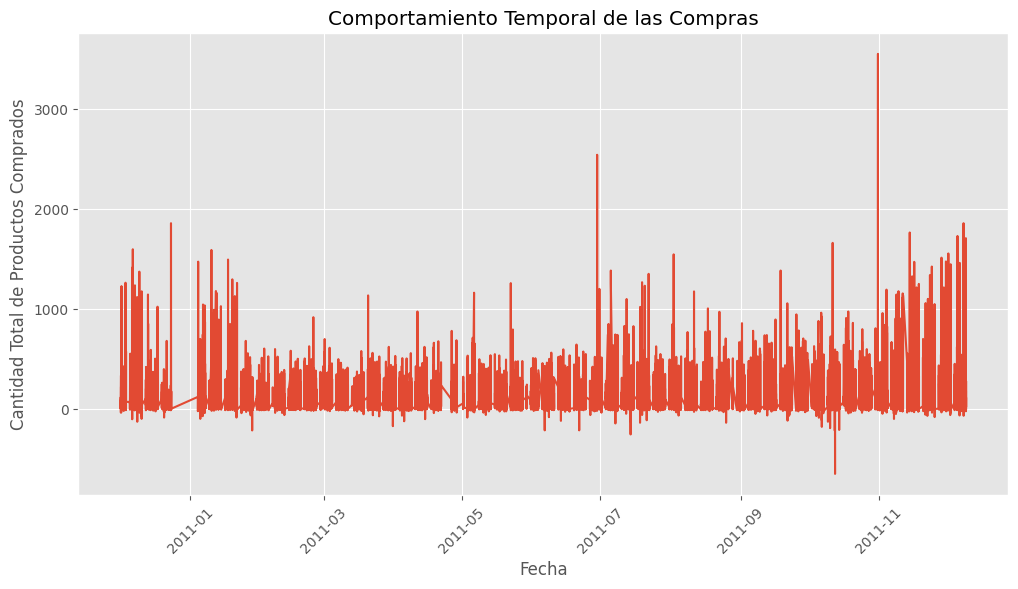

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(purchases_per_day['InvoiceDate'], purchases_per_day['Quantity'])
plt.title("Comportamiento Temporal de las Compras")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Total de Productos Comprados")
plt.xticks(rotation=45)
plt.show()

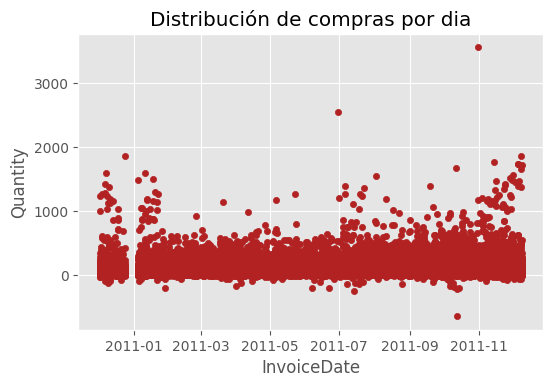

In [ ]:
# Gráfico de dispercion
fig, ax = plt.subplots(figsize=(6, 3.84))

# Changed df.plot() to purchases_per_day.plot()
purchases_per_day.plot(
    x    = 'InvoiceDate', # Changed from purchases_per_day['InvoiceDate']
    y    = 'Quantity', # Changed from purchases_per_day['Quantity']
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de compras por dia'); # Changed title for better clarity

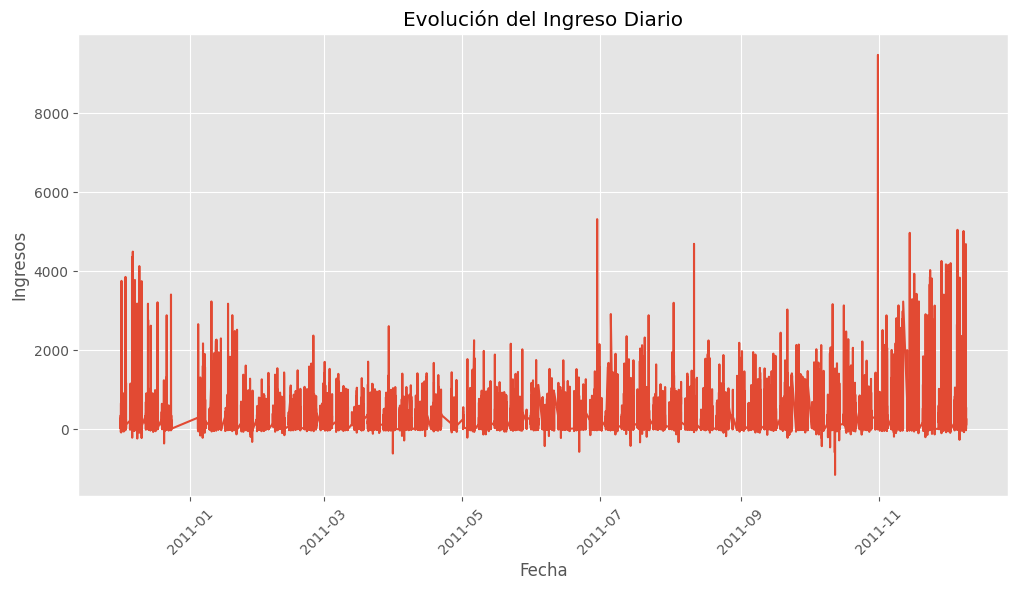

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(revenue_per_day['InvoiceDate'], revenue_per_day['Revenue'])
plt.title("Evolución del Ingreso Diario")
plt.xlabel("Fecha")
plt.ylabel("Ingresos")
plt.xticks(rotation=45)
plt.show()

# Análisis de distribución (incluyendo si hay sesgo o simetría).

In [ ]:
quantity_skew = df['Quantity'].skew()
unitprice_skew = df['UnitPrice'].skew()
print("Skewness de Quantity:", quantity_skew)
print("Skewness de UnitPrice:", unitprice_skew)

Skewness de Quantity: 0.9893412397993189
Skewness de UnitPrice: 1.1492424358464193


## Calculo de boleta

In [ ]:
df['Boleta'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df['Boleta'].describe()

,Boleta
count,444108.000000
mean,10.470162
std,11.705544
min,-97.800000
25%,2.950000
50%,6.800000
75%,15.000000
max,191.590000


# Reflexiones o conclusiones preliminares sobre el comportamiento de los datos.

Podemos ver que con mucha diferencia el pais con mas compras es **United Kingdom**, con un total de 412.332 compras en el año 2021

El producto mas vendido en el año 2021 es (WHITE HANGING HEART T-LIGHT HOLDER), con un total de 1.976 vendidos en ese año.
Sobre los 1.857 unidades vendidas de JUMBO BAG RED RETROSPOT en el año 2021

El comportamiento de las compras no sigue un patron estable, pero se puede observar que en el mes de enero y diciembre se encuentran las mayores cantidades de compras.

# Regracion Lineal

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


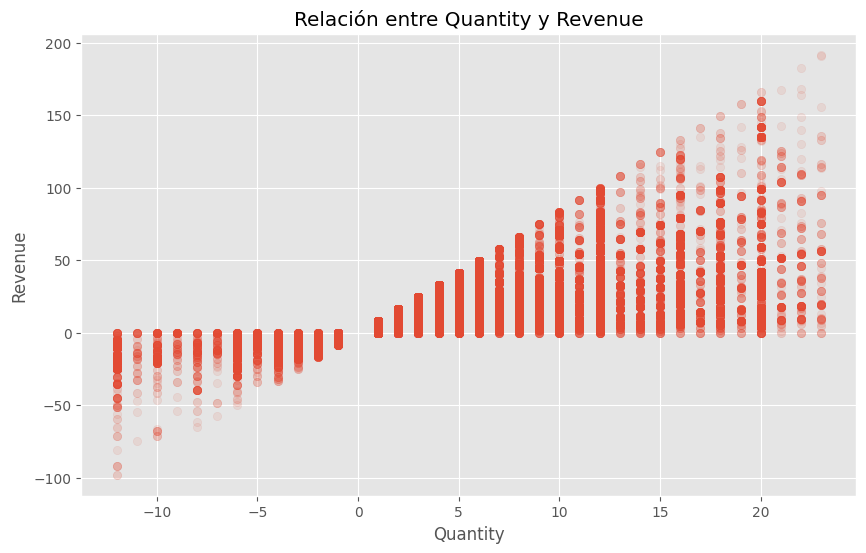

In [ ]:
import matplotlib.pyplot as plt

# Para evitar problemas de sobreposición, se usa transparencia (alpha)
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity'], df['Revenue'], alpha=0.1)
plt.title("Relación entre Quantity y Revenue")
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.show()

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = df[['Quantity']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [2.92894186]
Coeficiente: [('Quantity', np.float64(1.570607320650211))]
Coeficiente de determinación R^2: 0.3834102108866303


In [ ]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones
       )
rmse = np.sqrt(rmse)
print("")
print(f"El error (rmse) de test es: {rmse}")

[[12.35258578]
 [ 4.49954918]
 [34.34108827]]

El error (rmse) de test es: 9.16070913287474


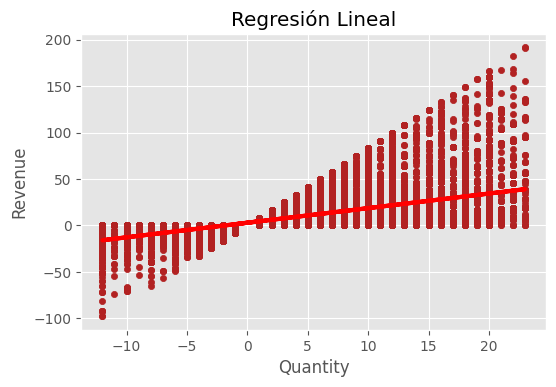

In [ ]:
# Grafiquemos la regresión

fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'Quantity',
    y    = 'Revenue',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

y_pred = modelo.predict(X_train)

plt.plot(X_train[:,0],  y_pred, color='red', linewidth=3)

plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Regresión Lineal')

plt.show()